In [1]:
from skimage import data,io,filters
import cv2
import numpy as np

In [2]:
image = io.imread('/lena.jpg')
io.imshow(image)

FileNotFoundError: No such file: 'c:\lena.jpg'

In [4]:
h = image.shape[0]
w = image.shape[1]
print(h,w)

256 256


<ipython-input-7-48a7e0d4f311>:5: RuntimeWarning: overflow encountered in ubyte_scalars
  image1[i][j] = min((image[i-1][j]+image[i+1][j]+image[i][j+1]+image[i][j-1]+image[i][j])/5,255)


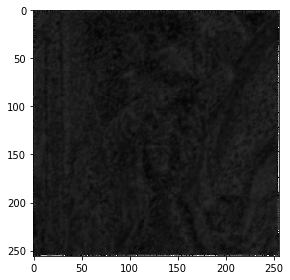

In [7]:
# average filtering
image1=image
for i in range(1,image.shape[0]-1):
    for j in range(1,image.shape[1]-1):
        image1[i][j] = min((image[i-1][j]+image[i+1][j]+image[i][j+1]+image[i][j-1]+image[i][j])/5,255)
io.imshow(image1)

<ipython-input-8-17dac4be988f>:4: RuntimeWarning: overflow encountered in ubyte_scalars
  image1[i][j] = min((image[i-1][j]+image[i+1][j]+image[i][j+1]+image[i][j-1]+image[i][j]+image[i-1][j-1]+image[i-1][j+1]+image[i+1][j-1]+image[i+1][j+1])/9,255)


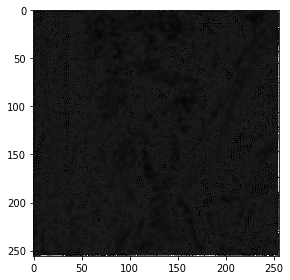

In [8]:
image1=image
for i in range(1,h-1):
    for j in range(1,w-1):
        image1[i][j] = min((image[i-1][j]+image[i+1][j]+image[i][j+1]+image[i][j-1]+image[i][j]+image[i-1][j-1]+image[i-1][j+1]+image[i+1][j-1]+image[i+1][j+1])/9,255)
io.imshow(image1)

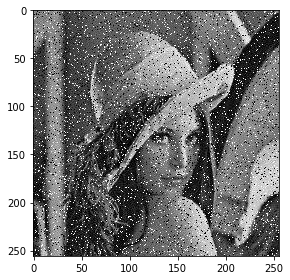

In [14]:
image = io.imread('/lena.jpg')
io.imshow(image)

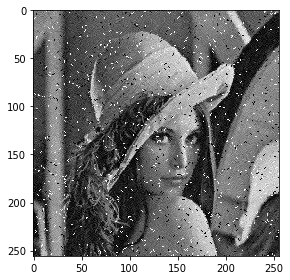

In [17]:
# min-max filter
for i in range(1,h-1):
    for j in range(1,w-1):
        x = max(image[i-1][j],image[i+1][j],image[i][j-1],image[i][j+1],image[i-1][j-1],image[i-1][j+1],image[i+1][j-1],image[i+1][j+1])
        k = min(image[i-1][j],image[i+1][j],image[i][j-1],image[i][j+1],image[i-1][j-1],image[i-1][j+1],image[i+1][j-1],image[i+1][j+1])
        image[i][j] = min(image[i][j],x)
        image[i][j] = max(image[i][j],k)
io.imshow(image) 

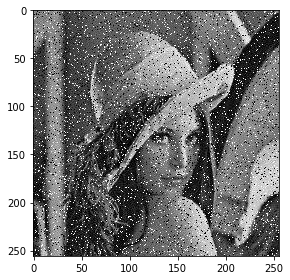

In [12]:
image = io.imread('/lena.jpg')
io.imshow(image)

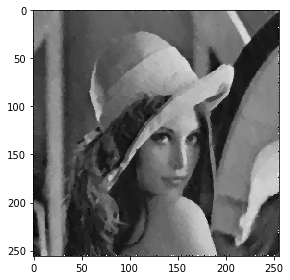

In [13]:
# median filter
for i in range(1,h-1):
    for j in range(1,w-1):
        x = [image[i-1][j],image[i+1][j],image[i][j-1],image[i][j+1],image[i-1][j-1],image[i-1][j+1],image[i+1][j-1],image[i+1][j+1],image[i][j]]
        x.sort()
        image[i][j] = x[4]
io.imshow(image) 

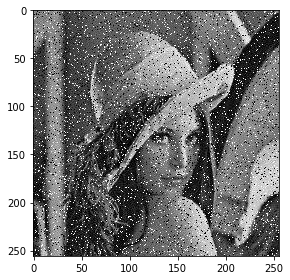

In [18]:
img = io.imread('/lena.jpg')
io.imshow(img)

In [19]:
# masking
m,n = img.shape
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

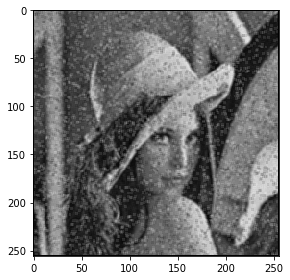

In [21]:
img_new = np.zeros([m, n])
  
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp
          
img_new = img_new.astype(np.uint8)
io.imshow(img_new)         
        

In [22]:
def conservative_smoothing_gray(data, filter_size):
    temp = []
    indexer = filter_size // 2
    new_image = data.copy()   
    nrow, ncol = data.shape    
    for i in range(nrow):        
        for j in range(ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if (k > -1) and (k < nrow):
                        if (m > -1) and (m < ncol):
                            temp.append(data[k,m])                            
            temp.remove(data[i,j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i,j] > max_value:
                new_image[i,j] = max_value
            elif data[i,j] < min_value:
                new_image[i,j] = min_value
            temp =[]
    
    return new_image.copy()

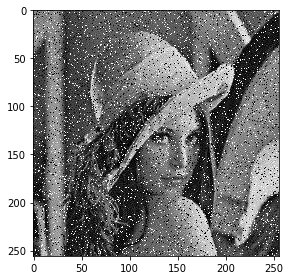

In [23]:
img2=conservative_smoothing_gray(img,19)
io.imshow(img2)

In [24]:
# weighted average
l1=[1,2,1]
l2=[2,4,2]
l3=[1,2,1]
mask=np.matrix([l1,l2,l3])
img_new=np.zeros([m,n])

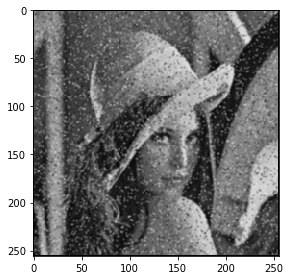

In [25]:
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp/16
          
img_new = img_new.astype(np.uint8)
io.imshow(img_new)

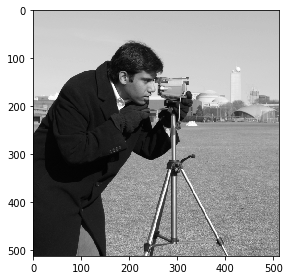

In [26]:
a=data.camera()
b=data.camera()
io.imshow(a)

In [29]:
# sobel operator
l1=[-1,0,1]
l2=[-2,0,2]
l3=[-1,0,1]
mask=np.matrix([l1,l2,l3])
m,n=a.shape
m,n
img_new=np.zeros([m,n])

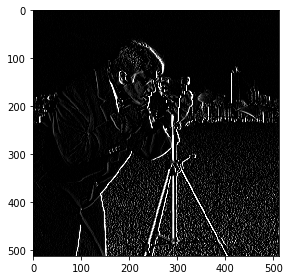

In [40]:
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = a[i-1, j-1]*mask[0, 0]+a[i-1, j]*mask[0, 1]+a[i-1, j + 1]*mask[0, 2]+a[i, j-1]*mask[1, 0]+ a[i, j]*mask[1, 1]+a[i, j + 1]*mask[1, 2]+a[i + 1, j-1]*mask[2, 0]+a[i + 1, j]*mask[2, 1]+a[i + 1, j + 1]*mask[2, 2]
        img_new[i, j]= max(0,min(255,temp))
img_new = img_new.astype(np.uint8)
np.absolute(img_new)
io.imshow(img_new)

In [41]:
l11=[1,2,1]
l12=[0,0,0]
l13=[-1,-2,1]
mask1=np.matrix([l11,l12,l13])
img_new1=np.zeros([m,n])

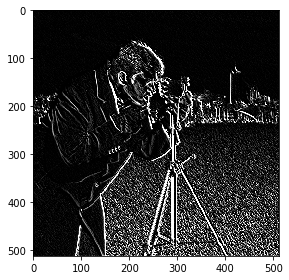

In [42]:
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img_new[i-1, j-1]*mask1[0, 0]+img_new[i-1, j]*mask1[0, 1]+img_new[i-1, j + 1]*mask1[0, 2]+img_new[i, j-1]*mask1[1, 0]+ img_new[i, j]*mask1[1, 1]+img_new[i, j + 1]*mask1[1, 2]+img_new[i + 1, j-1]*mask1[2, 0]+img_new[i + 1, j]*mask1[2, 1]+img_new[i + 1, j + 1]*mask1[2, 2]
        img_new1[i, j]= max(0,min(255,temp))
img_new1 = img_new1.astype(np.uint8)
io.imshow(img_new1)

In [43]:
image2 = data.camera()
h,w = image2.shape


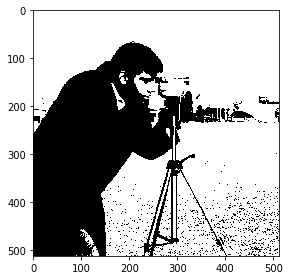

In [44]:
# Bit Plane Slicing
img1 = data.camera()
for i in range(h):
    for j in range(w):
        if(img1[i][j] & ((1<<7))):
            img1[i][j] = 255
        else:
            img1[i][j] =  0
io.imshow(img1)           
              

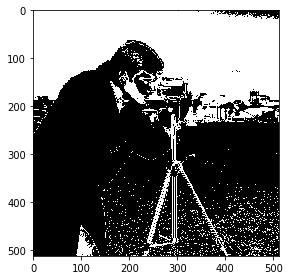

In [45]:

img1 = data.camera()
for i in range(h):
    for j in range(w):
        if(img1[i][j] & ((1<<6))):
             img1[i][j] = 255
        else:
            img1[i][j] =  0
io.imshow(img1)   

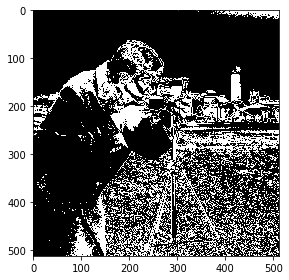

In [46]:
img1 = data.camera()
for i in range(h):
    for j in range(w):
        if(img1[i][j] & ((1<<5))):
             img1[i][j] = 255
        else:
            img1[i][j] =  0
io.imshow(img1) 

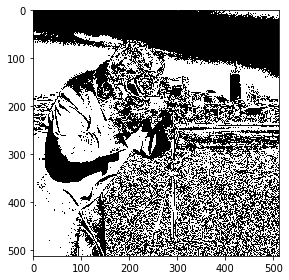

In [47]:
img1 = data.camera()
for i in range(h):
    for j in range(w):
        if(img1[i][j] & ((1<<4))):
             img1[i][j] = 255
        else:
            img1[i][j] =  0
io.imshow(img1) 

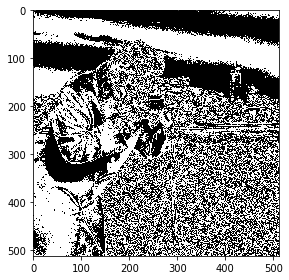

In [48]:
img1 = data.camera()
for i in range(h):
    for j in range(w):
        if(img1[i][j] & ((1<<3))):
             img1[i][j] = 255
        else:
            img1[i][j] =  0
io.imshow(img1) 

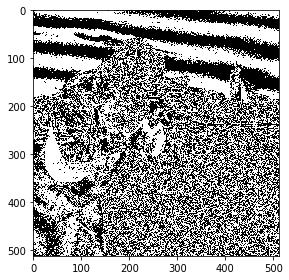

In [49]:
img1 = data.camera()
for i in range(h):
    for j in range(w):
        if(img1[i][j] & ((1<<2))):
             img1[i][j] = 255
        else:
            img1[i][j] =  0
io.imshow(img1) 

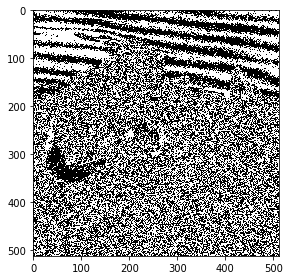

In [50]:
img1 = data.camera()
for i in range(h):
    for j in range(w):
        if(img1[i][j] & ((1<<1))):
             img1[i][j] = 255
        else:
            img1[i][j] =  0
io.imshow(img1) 

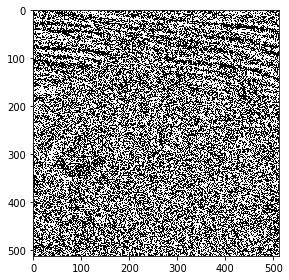

In [51]:
img1 = data.camera()
for i in range(h):
    for j in range(w):
        if(img1[i][j] & ((1<<0))):
             img1[i][j] = 255
        else:
            img1[i][j] =  0
io.imshow(img1) 

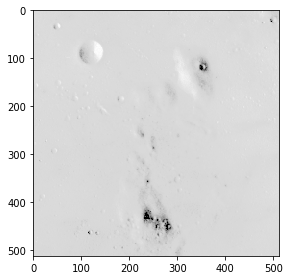

In [52]:
# log transformation
a=data.moon()
import math
ma=-1
for i in range(h):
    for j in range(w):
        ma=max(ma,a[i][j])
c=255/math.log(1+ma)
for i in range(h):
    for j in range(w):
        a[i][j]=c*math.log(1+a[i][j])
io.imshow(a)

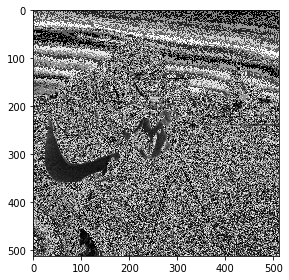

In [54]:
# power law
a=data.camera()
for i in range(h):
    for j in range(w):
        a[i][j]=1*math.pow((a[i][j]+1),2)
        a[i,j]= max(0,min(255,a[i,j]))
io.imshow(a)

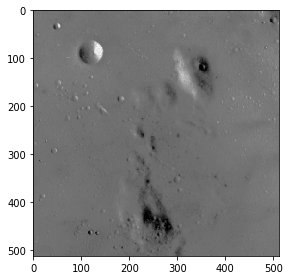

In [62]:
# histogram equalization
import matplotlib.pyplot as plt
a=data.moon()
io.imshow(a)

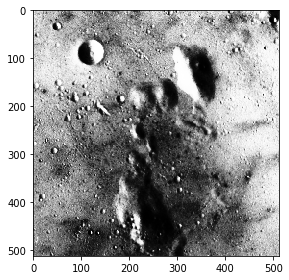

In [63]:
freq=[0]*256
h,w= a.shape
for i in range(h):
    for j in range(w):
        freq[a[i][j]]+=1
tot=h*w
freq1=[0]*256
freq1=freq
for i in range(0,256):
    freq1[i]=freq[i]/tot
for i in range(1,256):
    freq1[i]+=freq1[i-1]
c=data.moon()
for i in range(h):
    for j in range(w):
        c[i][j]= round(freq1[a[i][j]]*255)
io.imshow(c)

<StemContainer object of 3 artists>

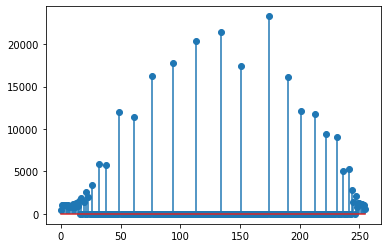

In [67]:
freq2=[0]*256
for i in range(h):
    for j in range(w):
        freq2[c[i][j]]+=1
        freq1[a[i][j]]+=1
plt.stem(freq2)


<StemContainer object of 3 artists>

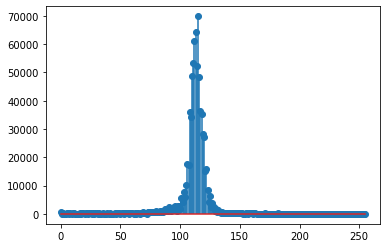

In [68]:
plt.stem(freq1)
